### Importamos librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point


data_crime = pd.read_csv('Crime_Data.csv')

In [2]:
df = pd.DataFrame(data_crime)

Eliminamos columnas innecesarias

In [3]:
df = df.drop(columns=['Mocodes','Premis Cd','Crm Cd 1','Part 1-2','Weapon Desc','Crm Cd 2','Crm Cd 3','Crm Cd 4','Status','Status Desc','Weapon Used Cd','Cross Street'])


Clasificamos en datos violentos y no violentos

In [4]:
non_violent_codes = [
    480,  # Hurto en tiendas
    510,  # Fraude financiero
    648, 649, 651, 652, 653, 654,  # Fraudes/estafas
    660, 661, 662, 664, 666, 668, 670,  # Delitos contra propiedad
    753, 755, 756,  # Vandalismo sin violencia
    805, 806, 810, 812, 813, 814, 815, 820, 821, 822, 830, 840, 845, 850, 860, 865, 870, 880, 884, 886, 888,  # Delitos administrativos
    910, 921, 924,  # Intrusión no violenta
    947,  # Daños a propiedad
    952, 955  # Delitos cibernéticos no violentos
]

In [5]:
violent_codes = [
    110,  # Homicidio
    121,  # Violación
    210,  # Robo con arma de fuego
    220,  # Robo con fuerza
    230,  # Agresión grave
    235, 236, 237,  # Agresiones/asalto
    310,  # Secuestro
    320, 330, 331,  # Delitos sexuales con violencia
    341, 343, 345,  # Uso de armas/blancas
    410, 420, 434, 435, 436, 437, 438, 439,  # Agresiones físicas
    440, 441, 442, 443, 444, 445, 446,  # Armas peligrosas
    520, 522,  # Incendios provocados
    624, 625, 626, 627,  # Robos residenciales con fuerza
    740, 745,  # Pandillerismo violento
    761, 762, 763,  # Amenazas con arma
    900, 901, 902, 903, 904, 906,  # Terrorismo/actividad extremista
    920, 922, 926, 928, 930, 931, 932, 933,  # Delitos de odio violentos
    940, 942, 943, 944, 946, 948, 949, 950, 951, 954, 956  # Otros crímenes violentos
]

Separamos crimenes con violentos y no violentos

In [6]:
# Clasificación binaria (violento/no violento)
df['Tipo_Delito'] = df['Crm Cd'].apply(
    lambda x: 'Violento' if x in violent_codes else (
        'No violento' if x in non_violent_codes else 'Ambiguo'
    )
)

In [7]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC']) #converti a date time ambas fechas
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['Vict Sex'].fillna(df['Vict Sex'].mode()[0], inplace=True) # impute por moda el sexo de la victima
df['Vict Descent'].fillna(df['Vict Descent'].mode()[0], inplace=True) # imputacion por moda la descendencia de la victima 
df['Premis Desc'].fillna(df['Premis Desc'].mode()[0], inplace=True) #imputacion por moda donde suceden los crimenes 


C:\Users\ferna\AppData\Local\Temp\ipykernel_23944\2458798531.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC']) #converti a date time ambas fechas
C:\Users\ferna\AppData\Local\Temp\ipykernel_23944\2458798531.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
C:\Users\ferna\AppData\Local\Temp\ipykernel_23944\2458798531.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

C:\Users\ferna\AppData\Local\Temp\ipykernel_23944\2289752317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.values, y=top_20.index, palette="viridis")


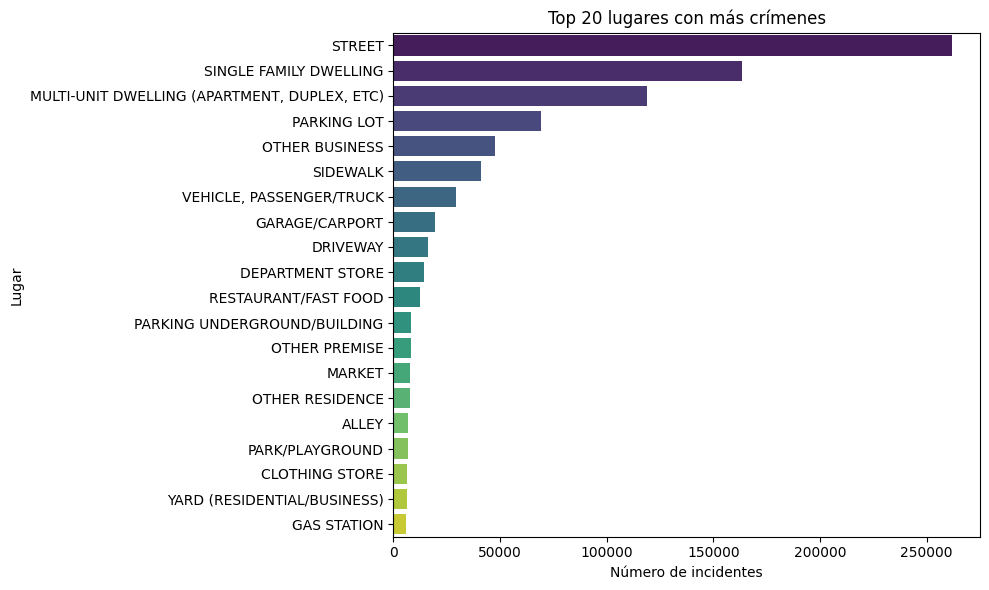

In [8]:
# Obtener los 20 lugares más frecuentes
top_20 = df['Premis Desc'].value_counts().head(20)

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20.values, y=top_20.index, palette="viridis")

plt.title("Top 20 lugares con más crímenes")
plt.xlabel("Número de incidentes")
plt.ylabel("Lugar")
plt.tight_layout()
plt.show()
# Esto no lo pide pero es bueno saber

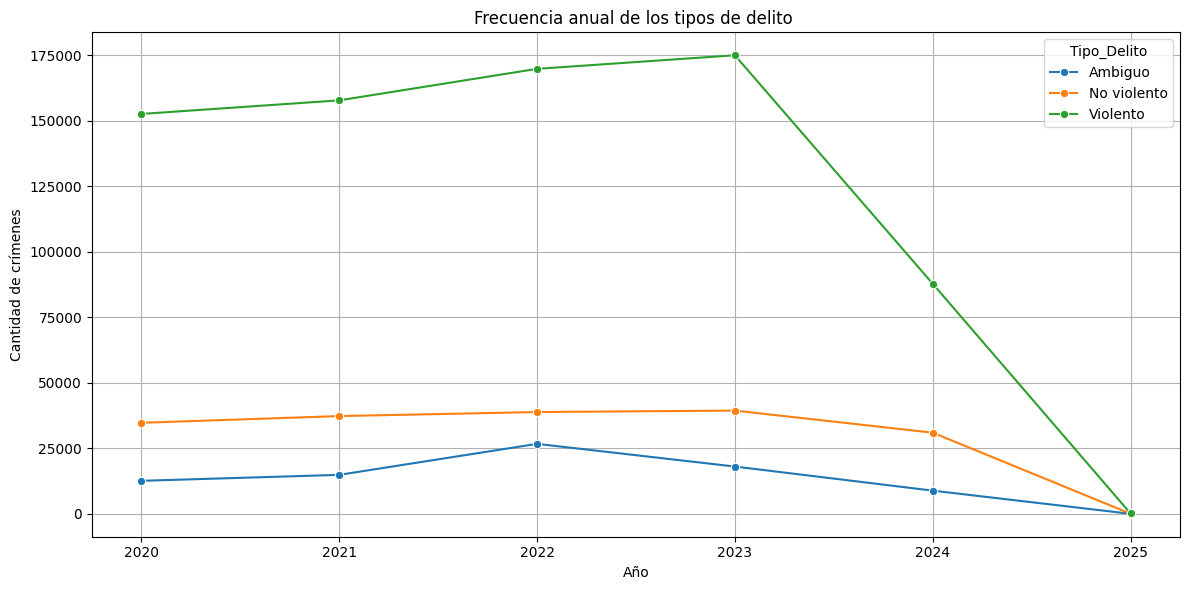

In [9]:
# Crear una columna con el año de ocurrencia del crimen
df['Año'] = df['DATE OCC'].dt.year

# Agrupar por año y tipo de delito, y contar la cantidad de ocurrencias
frecuencia_anual = df.groupby(['Año', 'Tipo_Delito']).size().reset_index(name='Frecuencia')

# Mostrar el resultado
# Elegimos los 5 tipos de delito más comunes para no saturar el gráfico
top_delitos = df['Tipo_Delito'].value_counts().index

# Filtramos solo esos delitos
frecuencia_top = frecuencia_anual[frecuencia_anual['Tipo_Delito'].isin(top_delitos)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=frecuencia_top, x='Año', y='Frecuencia', hue='Tipo_Delito', marker='o')
plt.title("Frecuencia anual de los tipos de delito ")
plt.xlabel("Año")
plt.ylabel("Cantidad de crímenes")
plt.grid(True)
plt.tight_layout()
plt.show()

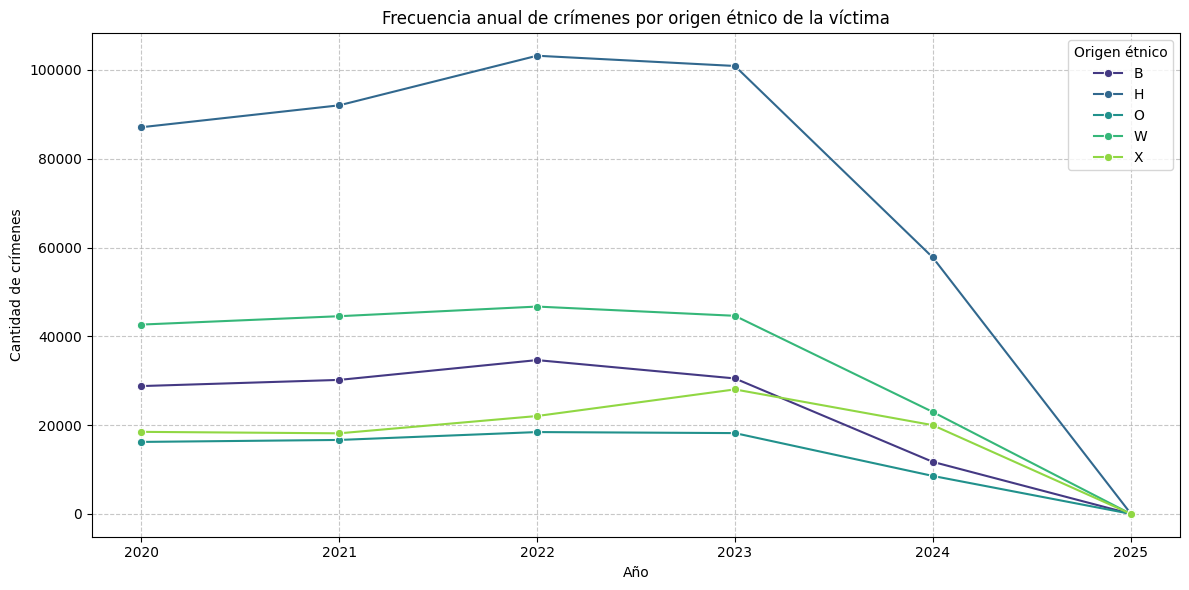

In [10]:
# Crear una columna con el año de ocurrencia del crimen
df['Año'] = df['DATE OCC'].dt.year

# Agrupar por año y origen étnico de la víctima (Vict Descent), y contar ocurrencias
frecuencia_anual = df.groupby(['Año', 'Vict Descent']).size().reset_index(name='Frecuencia')

# Mostrar el resultado
# Seleccionamos los 5 orígenes étnicos más comunes para mejor visualización
top_descents = df['Vict Descent'].value_counts().head(5).index

# Filtramos solo esos grupos
frecuencia_top = frecuencia_anual[frecuencia_anual['Vict Descent'].isin(top_descents)]

# Configurar el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=frecuencia_top, 
    x='Año', 
    y='Frecuencia', 
    hue='Vict Descent',  # Usamos Vict Descent para diferenciar líneas
    marker='o',
    palette='viridis'  # Mejor contraste de colores
)

plt.title("Frecuencia anual de crímenes por origen étnico de la víctima")
plt.xlabel("Año")
plt.ylabel("Cantidad de crímenes")
plt.legend(title='Origen étnico')  # Leyenda más descriptiva
plt.grid(True, linestyle='--', alpha=0.7)  # Grid más suave
plt.tight_layout()
plt.show()

In [12]:

# Cargar vecindarios desde la API
neighborhoods = gpd.read_file("https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/LA_Times_Neighborhoods/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")


In [13]:

# Crear geometría a partir de LAT y LON
df['geometry'] = df.apply(lambda row: Point(row['LON'], row['LAT']), axis=1)

# Convertir df a GeoDataFrame
df = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")


In [14]:
neighborhoods = neighborhoods.to_crs(df.crs)
df= gpd.sjoin(df, neighborhoods, how="left", predicate="within")

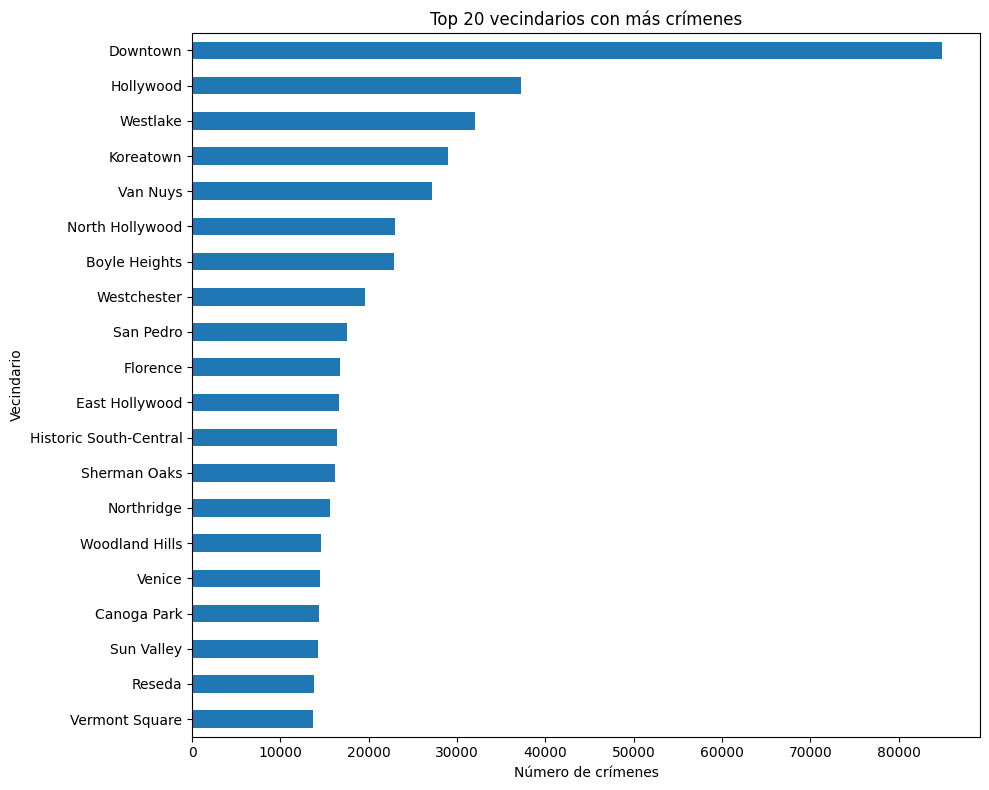

In [17]:
df['name'].value_counts().head(20).plot(kind='barh', figsize=(10, 8))
plt.xlabel('Número de crímenes')
plt.ylabel('Vecindario')
plt.title('Top 20 vecindarios con más crímenes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [21]:
# Tasa de crimen por vecindario
crime_by_neighborhood = (df.groupby('name').size())/len(df)

# Mostrar los resultados
print(crime_by_neighborhood)

name
Adams-Normandie           0.003780
Arleta                    0.003952
Arlington Heights         0.005207
Atwater Village           0.002484
Baldwin Hills/Crenshaw    0.009940
                            ...   
Westwood                  0.006733
Wilmington                0.013019
Windsor Square            0.001557
Winnetka                  0.008976
Woodland Hills            0.014507
Length: 114, dtype: float64


In [22]:
premisas_riesgo = df[df['Tipo_Delito'] == 'Violento']['Premis Desc'].value_counts().head(3)
premisas_riesgo

Premis Desc
STREET                                          158003
SINGLE FAMILY DWELLING                          116212
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     92055
Name: count, dtype: int64

In [23]:
edad_promedio = df.groupby('Vict Sex')['Vict Age'].mean()
conteo_sexo = df['Vict Sex'].value_counts(normalize=True)

In [24]:
edad_promedio

Vict Sex
-     0.000000
F    38.291204
H    37.456140
M    27.475690
X     2.645178
Name: Vict Age, dtype: float64